In [83]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('debutanizer_data.txt',delim_whitespace=True)  
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=42)  # 67% train, 33% temp
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  
scaler = StandardScaler()




C:\Users\ARITRA SARKAR\AppData\Local\Temp\ipykernel_1748\1157333818.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('debutanizer_data.txt',delim_whitespace=True)


In [86]:
#Normalize the features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  
X_val=scaler.transform(X_val)

X_train=torch.tensor(X_train,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)




In [87]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
           
        )
    
    def forward(self, x):
        return self.network(x)

input_size=X_train.shape[1]
model =SimpleNN(input_size)

In [88]:
import torch.optim as optim
import torch.nn as nn

pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


optimizer = optim.Adam(model.parameters(), lr=0.01)


epochs = 100
losses=[]
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train).squeeze()  
    loss = criterion(outputs, y_train)

    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


model.eval()
with torch.no_grad():
    test_logits = model(X_test).squeeze()
    test_outputs = torch.sigmoid(test_logits)
    predictions = (test_outputs >= 0.5).float()

    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy:.4f}")



Epoch [10/100], Loss: 0.5779
Epoch [20/100], Loss: 0.5623
Epoch [30/100], Loss: 0.5587
Epoch [40/100], Loss: 0.5557
Epoch [50/100], Loss: 0.5547
Epoch [60/100], Loss: 0.5534
Epoch [70/100], Loss: 0.5525
Epoch [80/100], Loss: 0.5518
Epoch [90/100], Loss: 0.5512
Epoch [100/100], Loss: 0.5506
Test Accuracy: 0.9671


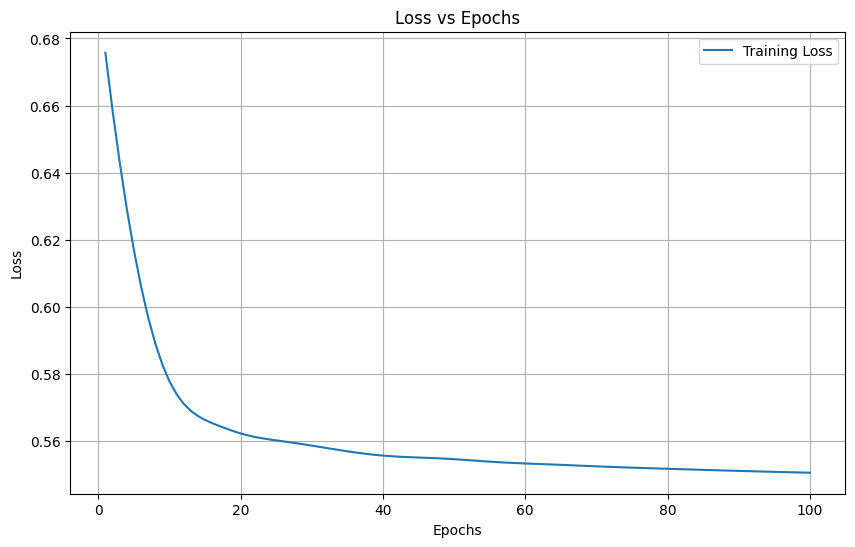

In [89]:
#plot the curve 
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid()
plt.show()